In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dff = pd.read_csv("Customer Flight Activity.csv")
dfl = pd.read_csv("Customer Loyalty History.csv")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df = pd.merge(dff, dfl, on="Loyalty Number", how="left")
df.shape

(405624, 25)

 # Fase 2: Visualización

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

    Month  Flights Booked
0       1           96936
1       2           96334
2       3          131199
3       4          112511
4       5          142170
5       6          173242
6       7          193431
7       8          169204
8       9          136379
9      10          129461
10     11          122250
11     12          166047


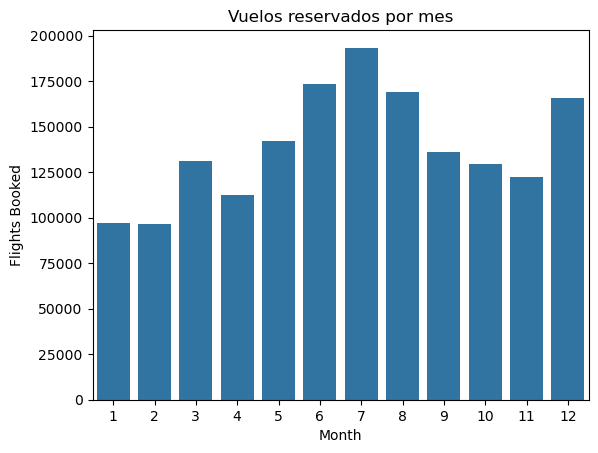

In [11]:
monthly_flights = df.groupby('Month')['Flights Booked'].sum().reset_index()
print(monthly_flights)
sns.barplot(data=monthly_flights, x='Month', y='Flights Booked')
plt.title("Vuelos reservados por mes")
plt.show()

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

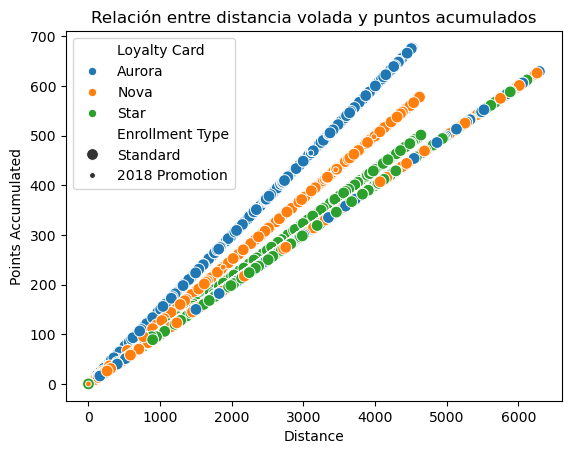

In [16]:
sns.scatterplot(data=df, x='Distance', y='Points Accumulated', hue='Loyalty Card', size='Enrollment Type')
plt.title("Relación entre distancia volada y puntos acumulados")
plt.show()

Text(0.5, 1.0, 'Mapa de calor de correlación')

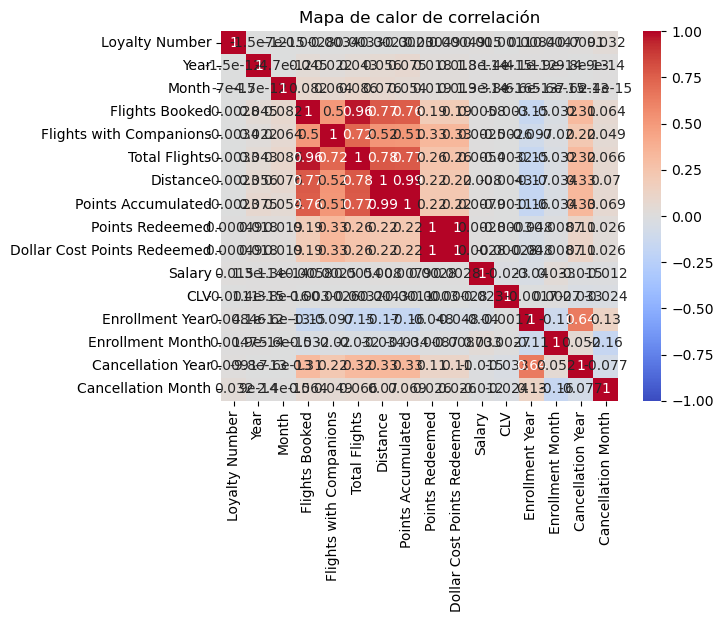

In [23]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.title("Mapa de calor de correlación")

3. ¿Cuál es la distribución de los clientes por provincia o estado?


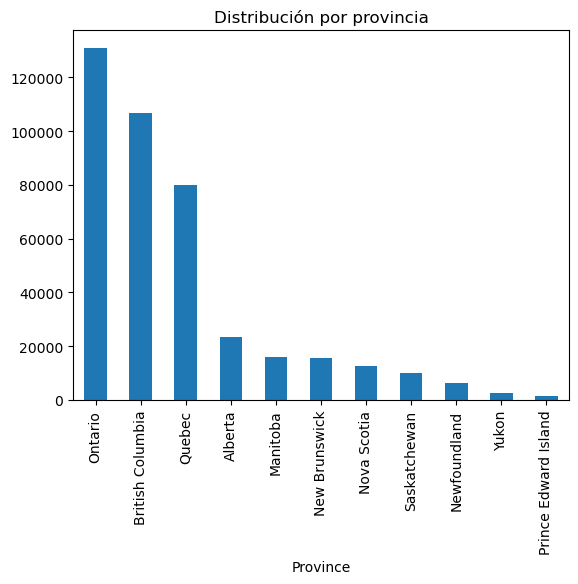

In [24]:
province_counts = df['Province'].value_counts()
province_counts.plot(kind='bar', title='Distribución por provincia')
plt.show()

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?


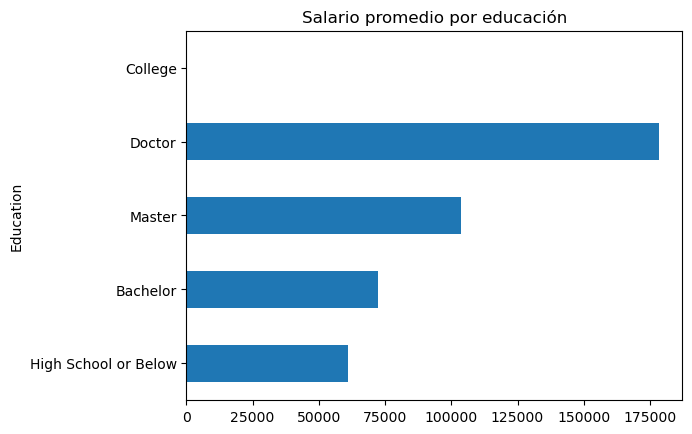

In [25]:
edu_salary = df.groupby('Education')['Salary'].mean().sort_values()
edu_salary.plot(kind='barh', title='Salario promedio por educación')
plt.show()

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

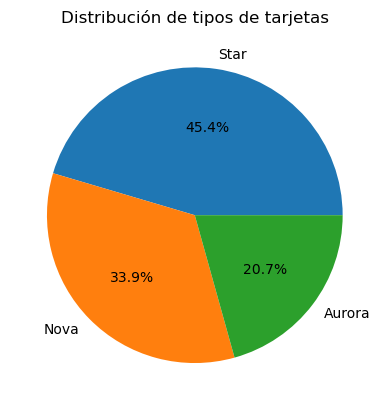

In [26]:
df['Loyalty Card'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribución de tipos de tarjetas')
plt.ylabel('')
plt.show()

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

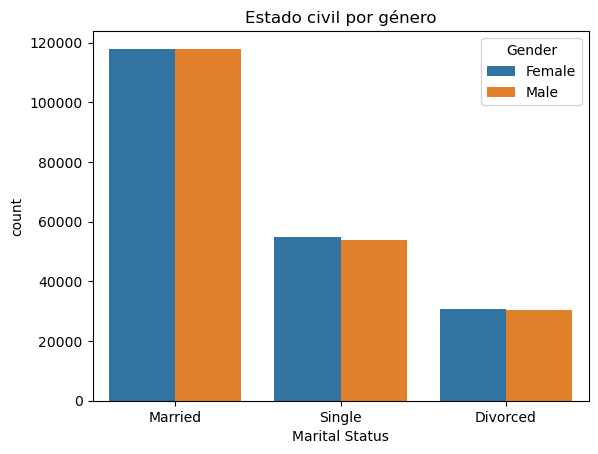

In [27]:
sns.countplot(data=df, x='Marital Status', hue='Gender')
plt.title('Estado civil por género')
plt.show()

In [34]:
edu_flights = df[['Flights Booked', 'Education']]
edu_flights.head()

,Flights Booked,Education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor


In [33]:
edu_stats = edu_flights.groupby('Education')['Flights Booked'].agg(['mean', 'std', 'count'])
print(edu_stats)

                          mean       std   count
Education                                       
Bachelor              4.091093  5.216995  253752
College               4.153012  5.242136  102672
Doctor                4.146281  5.250093   17856
High School or Below  4.155777  5.234551   19008
Master                4.184014  5.210294   12336
